## WORLD FOOD PRICES
The data below contains details of quantity the of food produced from 1992 to 2017, the prices and currency
from selected countries.

## Questions
How has food production grown over the years

What commodities have the most sales and value

what countries have the highiest production

what trends and recommedations can be derived from the dataset?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import csv
import requests

import utils

In [2]:
utils.DataExtraction.convert_to_usd

<function utils.DataExtraction.convert_to_usd(self, amount, rate)>

In [3]:
#!pip install forex-python

In [4]:
url = 'https://api.exchangerate-api.com/v4/latest/USD'

csv_file = 'Project_Data.csv'  
output_csv_file = 'currency_data_usd.csv'

utils.DataExtraction(csv_file, output_csv_file, url).read_data(local=True)

Exchange rate for currency MRO is not available.
Exchange rate for currency MRO is not available.
Exchange rate for currency MRO is not available.
Exchange rate for currency MRO is not available.
Exchange rate for currency MRO is not available.
Exchange rate for currency MRO is not available.
Exchange rate for currency MRO is not available.
Exchange rate for currency MRO is not available.
Exchange rate for currency MRO is not available.
Exchange rate for currency MRO is not available.
Exchange rate for currency MRO is not available.
Exchange rate for currency MRO is not available.
Exchange rate for currency MRO is not available.
Exchange rate for currency MRO is not available.
Exchange rate for currency MRO is not available.
Exchange rate for currency MRO is not available.
Exchange rate for currency MRO is not available.
Exchange rate for currency MRO is not available.
Exchange rate for currency MRO is not available.
Exchange rate for currency MRO is not available.
Exchange rate for cu

Exchange rate for currency Somaliland Shilling is not available.
Exchange rate for currency Somaliland Shilling is not available.
Exchange rate for currency Somaliland Shilling is not available.
Exchange rate for currency Somaliland Shilling is not available.
Exchange rate for currency Somaliland Shilling is not available.
Exchange rate for currency Somaliland Shilling is not available.
Exchange rate for currency Somaliland Shilling is not available.
Exchange rate for currency Somaliland Shilling is not available.
Exchange rate for currency Somaliland Shilling is not available.
Exchange rate for currency Somaliland Shilling is not available.
Exchange rate for currency Somaliland Shilling is not available.
Exchange rate for currency Somaliland Shilling is not available.
Exchange rate for currency Somaliland Shilling is not available.
Exchange rate for currency Somaliland Shilling is not available.
Exchange rate for currency Somaliland Shilling is not available.
Exchange rate for currenc

ValueError: dict contains fields not in fieldnames: 'USD Amount'

In [24]:
data = pd.read_csv("currency_data_usd.csv", encoding = 'latin-1')

In [25]:
food = data.copy()

In [26]:
food.head(5)

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource,USD Amount
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP,4281.5
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP,4281.5
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP,4281.5
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP,4281.5
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP,4281.5


In [27]:
food.columns

Index(['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
       'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id',
       'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource',
       'USD Amount'],
      dtype='object')

In [28]:
col_to_drop = []
for col in food.columns:
    if 'id' in col or 'source' in col:
        col_to_drop.append(col)

In [29]:
col_to_drop

['adm0_id',
 'adm1_id',
 'mkt_id',
 'cm_id',
 'cur_id',
 'pt_id',
 'um_id',
 'mp_commoditysource']

In [30]:
food.drop(col_to_drop, axis=1, inplace = True)

In [31]:
food = food.rename(columns={'adm0_name':'country', 'adm1_name': 'state', 'pt_name': 'business_scale','um_name':'measure', 'cur_name' :'currency','mp_month':'month','mp_year':'year','mp_price':'price'})
food.head(2)

,country,state,mkt_name,cm_name,currency,business_scale,measure,month,year,price,USD Amount
0,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,Retail,KG,1,2014,50.0,4281.5
1,Afghanistan,Badakhshan,Fayzabad,Bread,AFN,Retail,KG,2,2014,50.0,4281.5


In [32]:
food.columns

Index(['country', 'state', 'mkt_name', 'cm_name', 'currency', 'business_scale',
       'measure', 'month', 'year', 'price', 'USD Amount'],
      dtype='object')

In [33]:
for con in food['country'].unique():
    print("=" * 20)
    print(con.upper())
    temp_df = food.loc[food['country'] == con]
    print(f"{con}: {temp_df.shape}")
    print(temp_df.nunique())
    print(temp_df.groupby(['cm_name'])['USD Amount'].mean())

AFGHANISTAN
Afghanistan: (4676, 11)
country              1
state               11
mkt_name            11
cm_name              8
currency             1
business_scale       1
measure              5
month               12
year                18
price             1558
USD Amount        1558
dtype: int64
cm_name
Bread                                            3.785598e+03
Exchange rate                                    5.450670e+03
Fuel (diesel)                                    6.041168e+05
Livestock (sheep, one-year-old alive female)     1.529999e+08
Rice (low quality)                               3.217761e+03
Wage (non-qualified labour, non-agricultural)    2.925752e+06
Wage (qualified labour)                          5.640442e+04
Wheat                                            1.552054e+03
Name: USD Amount, dtype: float64
ALGERIA
Algeria: (1784, 11)
country             1
state               2
mkt_name            7
cm_name            24
currency            1
business_scale      1
m

Central African Republic: (963, 11)
country             1
state               4
mkt_name            4
cm_name             6
currency            1
business_scale      1
measure             2
month              12
year               12
price             773
USD Amount        773
dtype: int64
cm_name
Cassava (cossette)    155085.310154
Maize                 143673.885390
Millet                247319.410697
Oil (groundnut)       797356.166667
Rice                  288136.174710
Wheat flour           384088.838164
Name: USD Amount, dtype: float64
CHAD
Chad: (3205, 11)
country             1
state              11
mkt_name           13
cm_name            10
currency            1
business_scale      1
measure             3
month              12
year               15
price             567
USD Amount        567
dtype: int64
cm_name
Exchange rate                                     3.423979e+05
Livestock (goat, medium-sized castrated male)     1.061394e+07
Livestock (sheep, medium-sized castrated 

El Salvador: (6011, 11)
country              1
state               12
mkt_name            14
cm_name              4
currency             1
business_scale       1
measure              1
month               12
year                13
price             2223
USD Amount        2223
dtype: int64
cm_name
Beans (red)         55.532193
Beans (silk red)    59.308950
Maize (white)       16.225427
Rice                37.449336
Name: USD Amount, dtype: float64
ETHIOPIA
Ethiopia: (9604, 11)
country              1
state                9
mkt_name            62
cm_name             17
currency             1
business_scale       2
measure              5
month               12
year                13
price             1566
USD Amount        1566
dtype: int64
cm_name
Beans (fava, dry)           507.073277
Exchange rate              1160.676103
Fuel (diesel)               880.522705
Fuel (kerosene)             791.404784
Fuel (petrol-gasoline)      979.804847
Lentils                     923.391317
Livestock (

Honduras: (523, 11)
country             1
state               0
mkt_name            1
cm_name             5
currency            1
business_scale      1
measure             1
month              12
year               11
price             513
USD Amount        513
dtype: int64
cm_name
Beans (red)            1090.743754
Maize (white)           357.467221
Maize flour (white)     725.322118
Rice (milled 80-20)     848.313353
Sorghum (white)         434.238958
Name: USD Amount, dtype: float64
INDIA
India: (68308, 11)
country              1
state               28
mkt_name            61
cm_name             21
currency             1
business_scale       1
measure              2
month               12
year                24
price             9830
USD Amount        9830
dtype: int64
cm_name
Ghee (vanaspati)        6284.034234
Lentils                 5566.808798
Lentils (masur)         5825.150233
Lentils (moong)         7568.157884
Lentils (urad)          9654.665734
Milk (pasteurized)      3088.8

Liberia: (5832, 11)
country              1
state               15
mkt_name            22
cm_name              9
currency             1
business_scale       1
measure              4
month               12
year                12
price             1653
USD Amount        1653
dtype: int64
cm_name
Cassava (fresh)           103247.311797
Cocoa                      21871.419204
Cowpeas                    16982.266856
Exchange rate              16168.533784
Fuel (diesel)              63724.619123
Fuel (petrol-gasoline)     62958.786623
Oil (palm)                 68198.829208
Rice (imported)           511722.305982
Rice (white, imported)    482166.461704
Name: USD Amount, dtype: float64
MADAGASCAR
Madagascar: (6437, 11)
country              1
state                6
mkt_name            31
cm_name              8
currency             1
business_scale       2
measure              2
month               12
year                14
price             2606
USD Amount        2606
dtype: int64
cm_name
Fuel 

Philippines: (18115, 11)
country              1
state               17
mkt_name            17
cm_name             17
currency             1
business_scale       3
measure              2
month               12
year                18
price             8310
USD Amount        8310
dtype: int64
cm_name
Beans (mung)                      4204.949963
Cabbage                           2449.529196
Carrots                           3246.964265
Eggs                               282.121661
Fish (fresh)                      5921.894862
Garlic                           10076.564062
Groundnuts (unshelled)            5469.978451
Meat (beef, chops with bones)    10178.966528
Meat (chicken, whole)             7410.258046
Meat (pork)                      10011.099507
Onions (red)                      4184.442692
Onions (white)                    3788.056287
Potatoes (Irish)                  3373.203783
Rice (paddy)                       812.400718
Rice (regular, milled)            1794.100383
Sweet potat

Turkey: (1566, 11)
country              1
state                0
mkt_name             1
cm_name             44
currency             1
business_scale       1
measure              5
month               12
year                 5
price             1220
USD Amount        1220
dtype: int64
cm_name
Apples (red)                                       62.101327
Bananas                                           138.469404
Beans (white)                                     201.992658
Bread (common)                                     81.762503
Bread (pita)                                       62.422000
Bulgur                                             69.206764
Cabbage                                            32.115906
Cauliflower                                        64.215785
Cheese                                            401.554000
Chickpeas                                         173.926375
Cocoa (powder, not sweetened)                     965.163440
Coffee                              

cm_name
Millet                4527.620350
Sorghum               2966.693880
Sorghum (food aid)    3190.616708
Wheat                 1634.501770
Name: USD Amount, dtype: float64
EGYPT
Egypt: (1310, 11)
country             1
state               0
mkt_name            1
cm_name            22
currency            1
business_scale      1
measure             4
month              12
year                8
price             776
USD Amount        776
dtype: int64
cm_name
Beans (fava, dry)              333.792106
Cheese                         588.843000
Cheese (picon)                 178.853100
Eggs                            28.961580
Garlic                         358.749042
Ghee (artificial)              375.606718
Ghee (natural)                1484.008221
Lentils                        380.738970
Meat (beef)                   1805.696610
Meat (beef, without bones)    3309.178000
Meat (chicken, frozen)         619.570866
Oil (maize)                    429.255536
Oil (mixed)                    4

In [34]:
list(food['country'].unique())

['Afghanistan',
 'Algeria',
 'Armenia',
 'Azerbaijan',
 'Bangladesh',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Colombia',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Democratic Republic of the Congo',
 'Djibouti',
 'El Salvador',
 'Ethiopia',
 'Gambia',
 'Georgia',
 'Ghana',
 'Guatemala',
 'Guinea-Bissau',
 'Guinea',
 'Haiti',
 'Honduras',
 'India',
 'Indonesia',
 'Iran  (Islamic Republic of)',
 'Iraq',
 'Jordan',
 'Kenya',
 'Kyrgyzstan',
 "Lao People's Democratic Republic",
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Myanmar',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Panama',
 'Peru',
 'Philippines',
 'Rwanda',
 'Senegal',
 'Somalia',
 'Sri Lanka',
 'Swaziland',
 'Syrian Arab Republic',
 'Tajikistan',
 'Timor-Leste',
 'Turkey',
 'Uganda',
 'Ukraine',
 'United Republic of Tanzania',
 'Yemen',
 'Zambia',
 'Zimbabwe',
 'St

In [35]:
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data,x=feature,palette="Paired",order=data[feature].value_counts().index[:n].sort_values(),)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2  
        y = p.get_height() 
        ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)  
    plt.show()

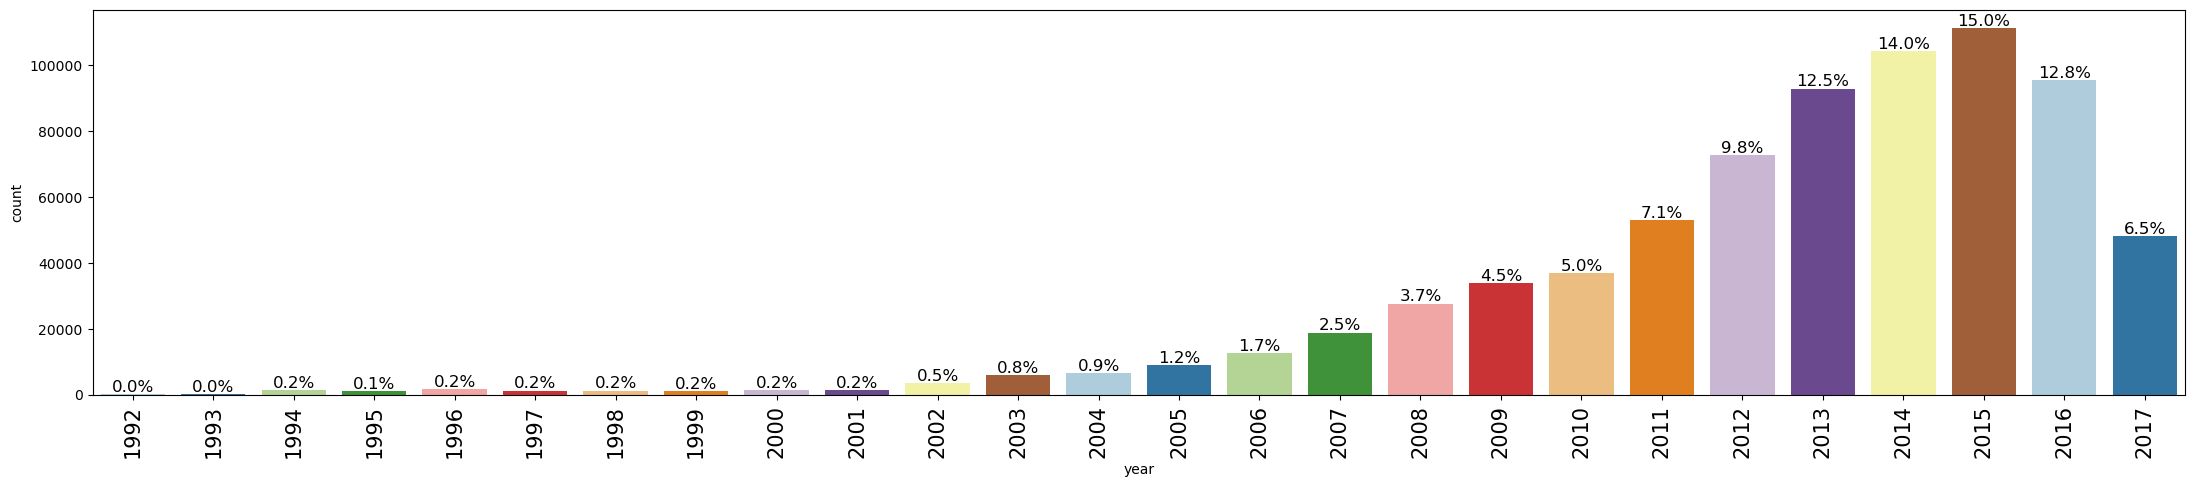

In [36]:
labeled_barplot(food,'year', perc=True)

### Food Production.

from the above we see that between 2007 and 2015 there was a steady growth in food production
A decline started in 2016 and 2017 due to a combination of factors:
- Insecurity in key food producing countries
- Climate change
- Poor infrastruture
- Political Instability
Future trends would continue to be unstable as most of the major issues are still unresolved

In [37]:
class Produce:
    @classmethod
    def group(self, list_of_countries, num_of_groups, random=False, display_type = 'bar'):
        num_per_group = round(len(list_of_countries) / num_of_groups)
        lis = []
        for i in range(num_of_groups):
            lis.append((list_of_countries[i * num_per_group: num_per_group * ( 1 + i)]))
        return lis, num_of_groups
    @classmethod
    def grouped_data(self, country_index, display_type = 'bar'):
        if display_type == 'bar':
            grouped_df = food[food['country'].isin(country_group[country_index])]
            labeled_barplot(food[food['country'].isin(country_group[country_index])],'country', perc=True)
            return grouped_df
        else:
            plt.figure(figsize=(20,14))
            sns.lineplot (x='year',y='USD Amount', data=food, label='blue')

#grp = input("Please, Enter number of groups to display: ")

country_group, num_of_groups = Produce.group(list(food['country'].unique()), int(input("Please, Enter number of groups to display: ")))

interact(Produce.grouped_data, country_index= range(num_of_groups), display_type=['bar', 'line Plot'])

Please, Enter number of groups to display: 9


interactive(children=(Dropdown(description='country_index', options=(0, 1, 2, 3, 4, 5, 6, 7, 8), value=0), Dro…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [38]:
food.groupby('country',as_index=False)['USD Amount'].count().nlargest(10,'USD Amount')

,country,USD Amount
56,Rwanda,115037
32,India,68308
50,Niger,36195
45,Mali,32702
19,Democratic Republic of the Congo,29997
72,Zambia,26374
69,Ukraine,25766
57,Senegal,22783
47,Mozambique,22652
24,Gambia,21575


In [39]:
food.groupby('cm_name',as_index=False)['USD Amount'].count().nlargest(5,'USD Amount')

,cm_name,USD Amount
141,Maize,36582
190,Millet,33889
276,Sorghum,31037
249,Rice (imported),25483
237,Rice,24210


In [40]:
def visualize_data(time_unit):
    if time_unit == 'Month':
        data = food.groupby('month')['USD Amount'].mean()
    elif time_unit == 'Year':
        data = food.groupby('year')['USD Amount'].mean()
    else:
        print("Invalid time unit. Please choose 'Month' or 'Year'.")
        return

    plt.figure(figsize=(10, 6))
    data.plot(kind='line')
    plt.xlabel(time_unit)
    plt.ylabel('USD Amount')
    plt.title(f'Total Amount per {time_unit}')
    plt.show()

interact(visualize_data, time_unit=['Month', 'Year'])


interactive(children=(Dropdown(description='time_unit', options=('Month', 'Year'), value='Month'), Output()), …

<function __main__.visualize_data(time_unit)>

In [41]:
grain_ds = ['Rice', 'Wheat', 'Beans', 'Sorghum','Maize','Millet', 'Groudnut','Sesame','Cashew']
grains = food[food['cm_name'].str.contains('|'.join(grain_ds), case=False)]
grains.head()

,country,state,mkt_name,cm_name,currency,business_scale,measure,month,year,price,USD Amount
40,Afghanistan,Badakhshan,Fayzabad,Wheat,AFN,Retail,KG,1,2003,7.0,599.41
41,Afghanistan,Badakhshan,Fayzabad,Wheat,AFN,Retail,KG,2,2003,6.0,513.78
42,Afghanistan,Badakhshan,Fayzabad,Wheat,AFN,Retail,KG,3,2003,7.0,599.41
43,Afghanistan,Badakhshan,Fayzabad,Wheat,AFN,Retail,KG,4,2003,6.0,513.78
44,Afghanistan,Badakhshan,Fayzabad,Wheat,AFN,Retail,KG,5,2003,6.0,513.78


In [42]:
fruit_veg_ds = ['Tomatoes', 'Cabbage', 'Cucumbers', 'Oranges','Spinach','Guava', 'Papaya','Blackberry','Broccoli','Mangoes','Pumpkin','Bananas','Passion fruit']
fruits_vegs = food[food['cm_name'].str.contains('|'.join(fruit_veg_ds), case=False)]
fruits_vegs.head()

,country,state,mkt_name,cm_name,currency,business_scale,measure,month,year,price,USD Amount
4831,Algeria,Alger,Algiers,Tomatoes,DZD,Retail,KG,4,2015,90.0,12204.0
4832,Algeria,Alger,Algiers,Tomatoes,DZD,Retail,KG,5,2015,91.0,12339.6
4833,Algeria,Alger,Algiers,Tomatoes,DZD,Retail,KG,6,2015,72.0,9763.2
4834,Algeria,Alger,Algiers,Tomatoes,DZD,Retail,KG,7,2015,55.0,7458.0
4835,Algeria,Alger,Algiers,Tomatoes,DZD,Retail,KG,8,2015,41.0,5559.6


In [43]:
print('The total amount of fruits and vegetables sold is:', fruits_vegs['USD Amount'].sum())
print('The total amount of grains sold is:', grains['USD Amount'].sum())

The total amount of fruits and vegetables sold is: 75100753172.27988
The total amount of grains sold is: 5884468302071.336


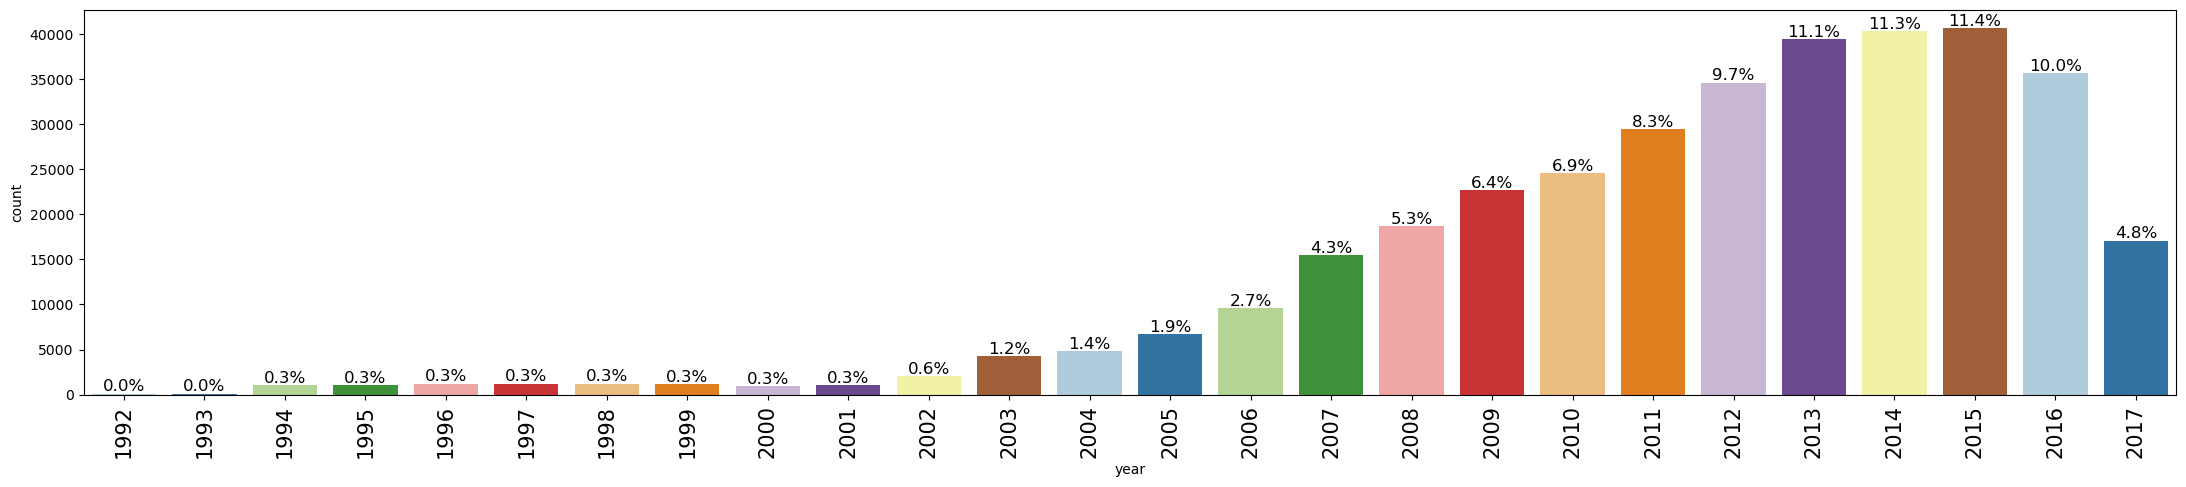

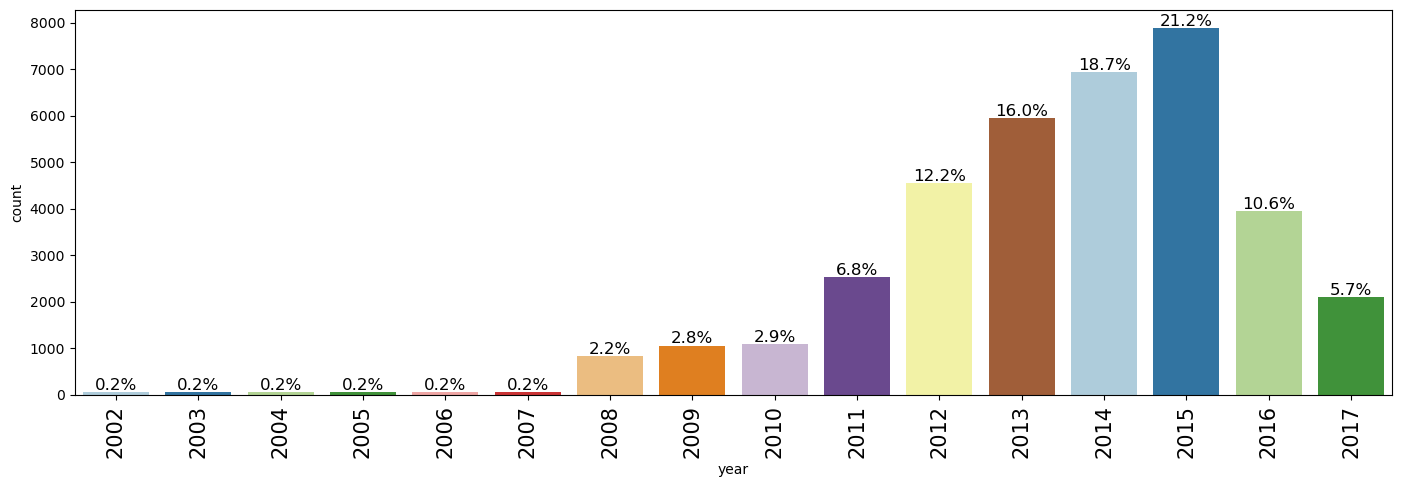

In [44]:
labeled_barplot(grains,'year', perc=True)
labeled_barplot(fruits_vegs,'year', perc=True)

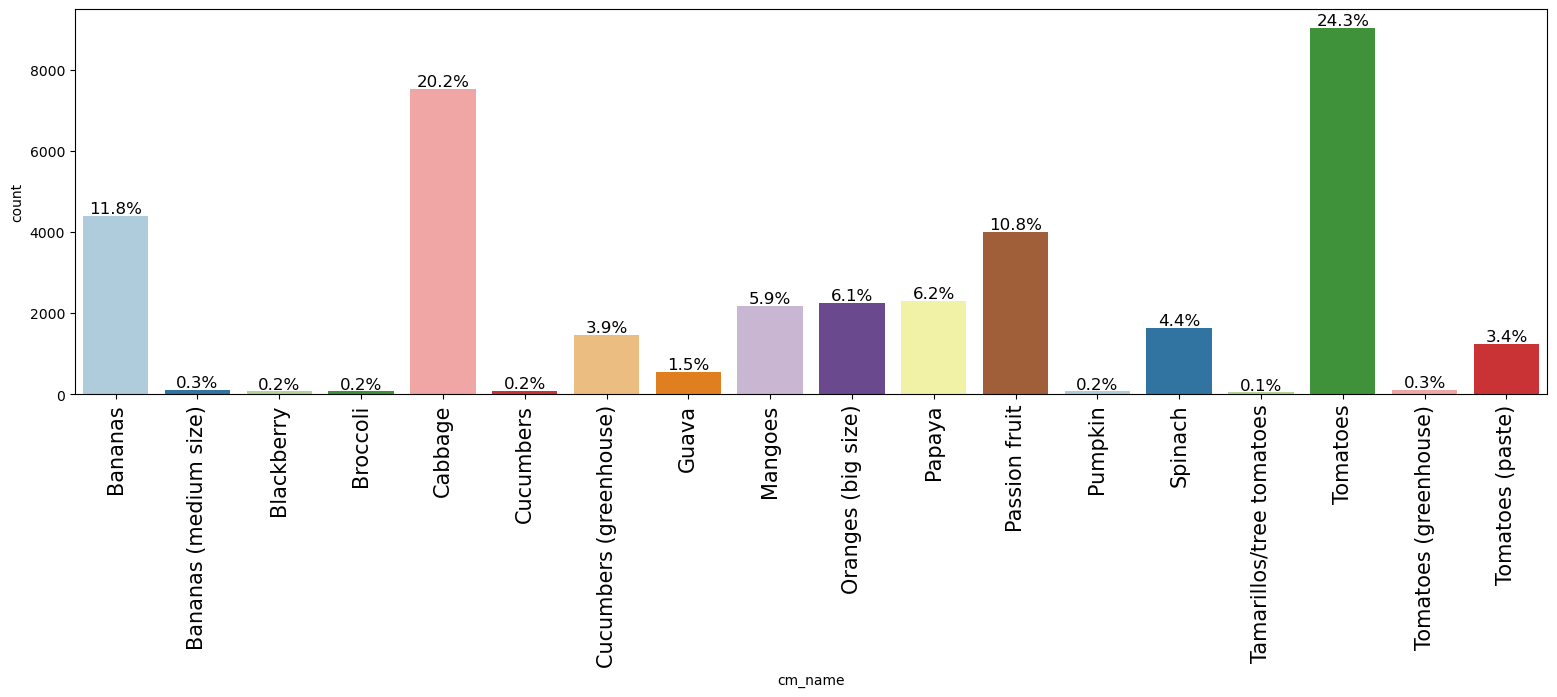

In [45]:
labeled_barplot(fruits_vegs,'cm_name', perc=True)

In [46]:
grains.groupby('cm_name',as_index=False)['USD Amount'].sum().nlargest(7,'USD Amount')

,cm_name,USD Amount
78,Rice (white),2.154963e+12
72,Rice (paddy),1.029767e+12
44,Rice,7.912826e+11
0,Beans,6.433294e+11
26,Maize,2.898538e+11
60,Rice (local),2.019136e+11
69,"Rice (ordinary, first quality)",1.105622e+11


In [47]:
fruits_vegs.groupby('cm_name',as_index=False)['USD Amount'].sum().nlargest(7,'USD Amount')

,cm_name,USD Amount
17,Tomatoes (paste),3.374126e+10
6,Cucumbers (greenhouse),8.014368e+09
15,Tomatoes,7.591506e+09
4,Cabbage,7.369192e+09
13,Spinach,5.644195e+09
11,Passion fruit,3.572764e+09
8,Mangoes,2.183736e+09


# Findings: